About Dataset
CONTEXT:
This dataset provides concise details about music tracks and their performance across various platforms. It includes essential information like track name, artist(s), release date, and presence in popular playlists and charts on platforms like Spotify, Apple Music, Deezer, and Shazam. Additionally, it features metrics such as BPM, key, mode, danceability, valence, energy, acousticness, instrumentalness, and liveness_speechiness, which offer insights into the musical characteristics and appeal of each track. With this data, analysts can evaluate the popularity, genre, and audience engagement of different music offerings across multiple streaming services.


Dataset Glossary (Column-wise)

track_name: The name of the track.

artist(s)_name: The name(s) of the artist(s) who created the track.

artist_count: The number of artists associated with the track.

released_year: The year when the track was released.

released_month: The month when the track was released.

released_day: The day when the track was released.

in_spotify_playlists: Indicates whether the track is included in Spotify playlists.

in_spotify_charts: Indicates whether the track is present in Spotify charts.

streams: The total number of streams the track has accumulated.

in_apple_playlists: Indicates whether the track is included in Apple Music playlists.

in_apple_charts: Indicates whether the track is present in Apple Music charts.

in_deezer_playlists: Indicates whether the track is included in Deezer playlists.

in_deezer_charts: Indicates whether the track is present in Deezer charts.

in_shazam_charts: Indicates whether the track is present in Shazam charts.

bpm: Beats per minute - a measure of tempo in music.

key: The musical key in which the track is composed.

mode: Indicates whether the track is in a major or minor key.

danceability_: A measure of how suitable a track is for dancing.

valence_: The musical positiveness conveyed by a track.

energy_: The perceived energy of a track.

acousticness_: A measure of how acoustic a track is.

instrumentalness_: A measure of whether a track contains vocals.

liveness_speechiness_: A measure of presence of live elements or spoken words in a track.

In [1]:
import pandas as pd
import sqlite3

df = pd.read_csv('Spotify_Songs.csv')
df.head()

,track_name,artist_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [2]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            817 non-null    object
 1   artist_name           817 non-null    object
 2   artist_count          817 non-null    int64 
 3   released_year         817 non-null    int64 
 4   released_month        817 non-null    int64 
 5   released_day          817 non-null    int64 
 6   in_spotify_playlists  817 non-null    int64 
 7   in_spotify_charts     817 non-null    int64 
 8   streams               817 non-null    object
 9   in_apple_playlists    817 non-null    int64 
 10  in_apple_charts       817 non-null    int64 
 11  in_deezer_playlists   817 non-null    object
 12  in_deezer_charts      817 non-null    int64 
 13  in_shazam_charts      817 non-null    object
 14  bpm                   817 non-null    int64 
 15  key                   817 non-null    object


In [3]:
df.isnull().sum()

track_name              0
artist_name             0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability            0
valence                 0
energy                  0
acousticness            0
instrumentalness        0
liveness                0
speechiness             0
dtype: int64

In [4]:
df=df[~(df['streams']=='BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3')]


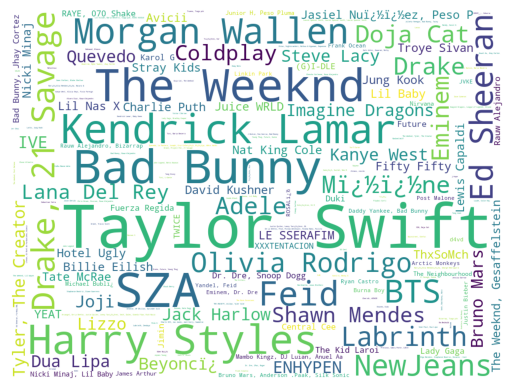

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(background_color='white',height=750,width=1000)
word_cloud = wc.generate_from_frequencies(df['artist_name'].value_counts())
plt.imshow(word_cloud)
plt.axis("off")
plt.show()


In [7]:
# import sqlalchemy and create a sqlite engine
from sqlalchemy import create_engine

engine = create_engine('sqlite://',echo=False)


# export the dataframe as a table 'playstore' to the sqlite engine
df.to_sql('spotify',con=engine)

816

In [8]:
## Test the code by select the complete table
df_sql = pd.read_sql_query('''Select * from spotify''',con=engine)
df_sql.sort_values(by='streams',ascending=False)

,index,track_name,artist_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,...,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
29,33,Anti-Hero,Taylor Swift,1,2022,10,21,9082,56,999748277,...,97,E,Major,64,51,63,12,0,19,5
220,253,Glimpse of Us,Joji,1,2022,6,10,6330,6,988515741,...,170,G#,Major,44,27,32,89,0,14,5
387,455,Seek & Destroy,SZA,1,2022,12,9,1007,0,98709329,...,152,C#,Major,65,35,65,44,18,21,7
84,98,Summertime Sadness,Lana Del Rey,1,2011,1,1,20333,52,983637508,...,112,C#,Minor,56,24,66,7,0,12,3
761,891,"Come Back Home - From ""Purple Hearts""",Sofia Carson,1,2022,7,12,367,0,97610446,...,145,G,Major,56,43,53,24,0,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,750,Falling,Harry Styles,1,2019,12,13,7556,0,1023187129,...,110,E,Major,57,6,27,84,0,9,3
320,366,Revenge,XXXTENTACION,1,2017,8,25,3600,11,1022258230,...,140,B,Minor,75,18,25,78,0,11,26
627,744,Right On,Lil Baby,1,2022,4,8,1116,0,101780047,...,166,D,Major,70,22,61,2,0,10,34
435,515,Best Friends,The Weeknd,1,2022,1,7,1292,0,101114984,...,87,E,Minor,49,49,59,44,0,35,21


In [9]:
#Query 1: convert
df1 = pd.read_sql_query('''Select cast(streams as int) as streams from spotify''',con=engine)
df1

,streams
0,141381703
1,133716286
2,140003974
3,800840817
4,303236322
...,...
811,91473363
812,121871870
813,73513683
814,133895612


In [10]:
#Query 2: To find the 5 track names having maximum number of streams
df_sql = pd.read_sql_query('''Select track_name,streams from spotify 
                                group by track_name 
                                order by streams desc limit 5''',con=engine)
df_sql    


,track_name,streams
0,Anti-Hero,999748277
1,Glimpse of Us,988515741
2,Seek & Destroy,98709329
3,Summertime Sadness,983637508
4,"Come Back Home - From ""Purple Hearts""",97610446


In [11]:
#Query 3: display the top 5 most streamed artist
df_sql = pd.read_sql_query('''Select artist_name, streams from spotify
                              group by artist_name
                              order by streams desc
                              limit 5''',con=engine)
df_sql                        

,artist_name,streams
0,Joji,988515741
1,Sofia Carson,97610446
2,"Lost Frequencies, Calum Scott",972509632
3,The Walters,972164968
4,(G)I-DLE,96273746


In [12]:
#Query 4: Select the tracks which are very popular for dance(>80)
pd.read_sql_query('''Select track_name, danceability from spotify 
                     where danceability > 80
                     limit 20''',con = engine)

,track_name,danceability
0,Sprinter,92
1,fukumean,85
2,La Bebe - Remix,81
3,Classy 101,86
4,"Peso Pluma: Bzrp Music Sessions, Vol. 55",85
5,Popular (with Playboi Carti & Madonna) - The I...,85
6,MOJABI GHOST,81
7,AMARGURA,92
8,La Bachata,84
9,Tï¿½ï¿,86


In [13]:
#Query 5: Top 5 tracks released in 2023
pd.read_sql_query('''Select track_name ,released_year,streams from spotify 
                     where streams in (Select streams from spotify where released_year = 2023
                     order by streams desc
                     limit 5) 
                     ''',con = engine)

,track_name,released_year,streams
0,fukumean,2023,95217315
1,Queencard,2023,96273746
2,Double Fantasy (with Future),2023,96180277
3,People Pt.2 (feat. IU),2023,95816024
4,Everything I Love,2023,95623148


In [14]:
#Query 6: Top instrumental songs after 2020.
pd.read_sql_query('''Select track_name,released_year from spotify where instrumentalness > 50 and released_year > 2020''',con= engine)


,track_name,released_year
0,WHERE SHE GOES,2023
1,"Link Up (Metro Boomin & Don Toliver, Wizkid fe...",2023
2,METAMORPHOSIS,2021
3,Static,2022
4,Poland,2022
